Load required libraries

In [2]:
%%capture
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np 
import os


In [2]:
train_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_train"
test_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_test"
pred_path=r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\seg_pred"

Load images with TensorFlow

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_path,image_size=(128,128),batch_size=32)


Found 6172 files belonging to 6 classes.


In [36]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_path,image_size=(128,128),batch_size=32)

Found 3000 files belonging to 6 classes.


Look at a few pictures

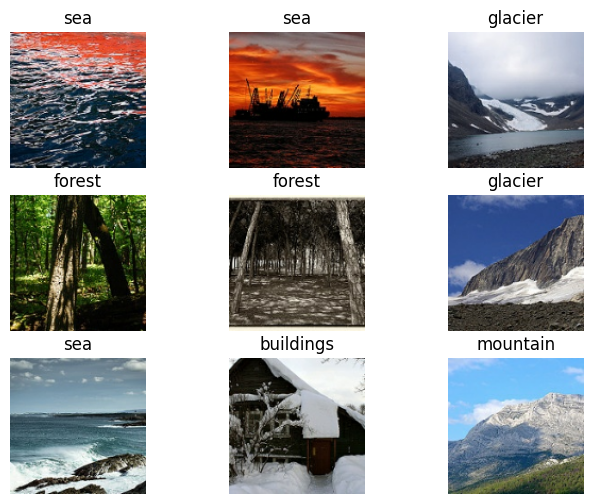

In [38]:
import matplotlib.pyplot as plt

class_names =  train_ds.class_names

plt.figure(figsize=(8,6))
for image,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()


Preprocessing and augmentation

In [8]:
preprocess = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.08)
])

In [21]:
%%capture
pip install tensorflow[and-cuda]

# Build a CNN model

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [60]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128,128,3)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Keras automatically matches input
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

c:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
num_classes = 6
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(64,64,3)),  # normalize pixel values to 0-1

    # First convolution block
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Second convolution block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Third convolution block
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    # Flatten the feature maps to a 1D vector
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # prevents overfitting

    # Output layer for 6 classes
    layers.Dense(num_classes, activation='softmax')
])


c:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
hist = model.fit(train_ds, epochs=15, validation_data=test_ds, callbacks=[tensorboard_callback])

Epoch 1/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.5332 - loss: 1.1957 - val_accuracy: 0.6117 - val_loss: 0.9901
Epoch 2/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 211ms/step - accuracy: 0.6494 - loss: 0.9127 - val_accuracy: 0.6920 - val_loss: 0.8309
Epoch 3/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.7054 - loss: 0.8003 - val_accuracy: 0.7037 - val_loss: 0.7861
Epoch 4/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.7450 - loss: 0.7062 - val_accuracy: 0.7470 - val_loss: 0.7095
Epoch 5/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 41s 211ms/step - accuracy: 0.7803 - loss: 0.6046 - val_accuracy: 0.7660 - val_loss: 0.6641
Epoch 6/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - accuracy: 0.8146 - loss: 0.5121 - val_accuracy: 0.7840 - val_loss: 0.6254
Epoch 7/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 63s 329ms/step - accuracy: 0.8393 - loss: 0.4565 - val_accuracy: 0.7813 - val_loss: 0.6361
Epoch 8/15
193/193 ━━━━━━━━━━━━━━━━━━━━ 61s 314ms/step - accuracy: 0.8527 - loss: 0

In [66]:
model.evaluate(test_ds)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7957 - loss: 0.9019


[0.9018793702125549, 0.7956666946411133]

In [71]:
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\CNN\Intel\test\217.jpg"
img = image.load_img(img_path, target_size=(128,128))  # resize same as training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: [5]
